# Análisis Exploratorio de Datos (EDA)  
## Dataset: Bank Marketing (Kaggle)

Este notebook presenta un **Análisis Exploratorio de Datos (EDA)** completo sobre el dataset *Bank Marketing*, con el objetivo de comprender la estructura de los datos, evaluar la calidad de la información y extraer insights relevantes sobre el comportamiento de los clientes frente a campañas de marketing bancario.

El análisis está orientado a sentar bases sólidas para futuros modelos predictivos.


# Información del conjunto de datos

Los datos se relacionan con campañas de marketing directo de una institución bancaria portuguesa. Estas campañas se basaron en contactos telefónicos, frecuentemente requiriendo múltiples llamadas al mismo cliente para determinar si suscribiría un depósito a plazo fijo ('sí') o no ('no'). 

Para analizar este conjunto de datos y predecir la probabilidad de suscripción, se implementarán y evaluarán los siguientes modelos de clasificación:
- **Decision Tree Classifier** (Árbol de Decisión)
- **Logistic Regression** (Regresión Logística)
- **K-Nearest Neighbors** (K-Vecinos Más Cercanos)
- **Gaussian Naive Bayes** (Clasificador Bayesiano)
- **Random Forest Classifier** 

### Primero reportemos la información de cada columna, qué naturaleza de datos trae y descripción de lo que representa cada uno 

Header | Data Type | Description (English / Español)
---|---------|---------
`Age` | int64 | Age of the customer — Edad del cliente
`Job` | object | Job / occupation of the customer — Trabajo / ocupación del cliente
`Marital` | object | Marital status (e.g., married, single, divorced) — Estado civil (p. ej., casado, soltero, divorciado)
`Education` | object | Education level (primary, secondary, tertiary, unknown) — Nivel de educación (primaria, secundaria, terciaria, desconocido)
`Default` | object | Has credit in default? (yes/no) — ¿Tiene crédito en mora? (sí/no)
`Housing` | object | Has housing loan? (yes/no) — ¿Tiene préstamo hipotecario? (sí/no)
`Loan` | object | Has personal loan? (yes/no) — ¿Tiene préstamo personal? (sí/no)
`Balance` | int64 | Customer's current balance  — Saldo actual del cliente 
`Contact` | object | Contact communication type (cellular, telephone, unknown) — Tipo de comunicación (celular, teléfono, desconocido)
`Month` | object | Last contact month of year (jan–dec) — Mes del último contacto en el año (ene–dic)
`Day` | int64 | Last contact day of month (1–31) — Último día de contacto del mes (1–31)
`Duration` | int64 | Last contact duration, in seconds — Duración de la última llamada, en segundos
`Campaign` | int64 | Number of contacts performed during this campaign for this client — Número de contactos realizados durante esta campaña para este cliente
`Pdays` | int64 | Number of days since the client was last contacted in a previous campaign (-1 means not previously contacted) — Nº de días desde el último contacto en una campaña anterior (-1 indica no contactado previamente)
`Previous` | int64 | Number of contacts performed before this campaign for this client — Nº de contactos realizados antes de esta campaña para este cliente
`Poutcome` | object | Outcome of the previous marketing campaign (unknown, failure, other, success) — Resultado de la campaña anterior (desconocido, fracaso, otro, éxito)
`Y` | object | Has the client subscribed a term deposit? (yes/no) — ¿Se suscribió el cliente a un depósito a plazo? (sí/no)

In [1]:
# Cargar librerias necesarias para el trabajo
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import sklearn
import scipy
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from collections import Counter
#from imblearn.under_sampling import NearMiss
#from imblearn.over_sampling import SMOTE
from sklearn import metrics

# for Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

import pickle

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# for styling
#plt.style.use('seaborn-whitegrid')


In [2]:
# Cargar data set bank-full.csv en la ruta de acceso relativa 'archive/bank-full.csv'
# El archivo utiliza comas como separador, por eso usamos sep=',' (pandas ya está importado en otra celda)
path = 'archive/bank-full.csv'
df = pd.read_csv(path, sep=',', usecols=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'])

In [3]:
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Calcular la cantidad de entradas nulas en cada columna
null_counts = df.isnull().sum()
print(null_counts)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### Como no hay elementos NaN en ninguna variable entonces no se imputa/reemplaza ningun valor

In [5]:
#Corregir la naturaleza de los datos. Age es un integer, job es categórico, marital es categórico, education es categórico, default debe ser booleano, balance es integer, housing debe ser booleano, loan debe ser booleano, contact es categórico, day es integer, month es categórico, duration es integer, campaign es integer, pdays es integer, previous es integer, poutcome es categórico, y debe ser booleano.
#Homogeneizar los datos booleanos. También miramos si hay elementos duplicados.
#df['default'] = df['default'].map({'yes': True, 'no': False})
#df['housing'] = df['housing'].map({'yes': True, 'no': False})
#df['loan'] = df['loan'].map({'yes': True, 'no': False})
#df['y'] = df['y'].map({'yes': True, 'no': False})
#Cambiar los tipos de datos de los booleanos
#df['default'] = df['default'].astype(bool)
#df['housing'] = df['housing'].astype(bool)
#df['loan'] = df['loan'].astype(bool)
#df['y'] = df['y'].astype(bool)
print(df.duplicated().sum())

df.info()
df.head()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Hasta aquí corregimos los tipos de las variables y en este caso al no haber elementos duplicados no se realiza ninguna eliminación 

In [6]:
#Veamos un describe de la tabla pero solo de las columnas numericas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Podemos observar que en balance tiene valores negativos por lo que hay clientes con deudas. Pdays tiene gran porncetaje de valores negativos por lo que hay muchos clientes que no fueron contactados previamente. 

In [7]:
#Mostrar las variables categoricas 
categorial_cols = df.select_dtypes(include=['object']).columns
print(categorial_cols)
#Mostrar los valores unicos de cada variable categorica y cuantos hay
for col in categorial_cols:
    unique_values = df[col].unique()
    print(f"Columna: {col}, Valores únicos: {unique_values}, Cantidad: {len(unique_values)}") 


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Columna: job, Valores únicos: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'], Cantidad: 12
Columna: marital, Valores únicos: ['married' 'single' 'divorced'], Cantidad: 3
Columna: education, Valores únicos: ['tertiary' 'secondary' 'unknown' 'primary'], Cantidad: 4
Columna: default, Valores únicos: ['no' 'yes'], Cantidad: 2
Columna: housing, Valores únicos: ['yes' 'no'], Cantidad: 2
Columna: loan, Valores únicos: ['no' 'yes'], Cantidad: 2
Columna: contact, Valores únicos: ['unknown' 'cellular' 'telephone'], Cantidad: 3
Columna: month, Valores únicos: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'], Cantidad: 12
Columna: poutcome, Valores únicos: ['unknown' 'failure' 'other' 'success'], Cantidad: 4
Columna: y, Valores únicos: ['n

### Podemos observar que las varibales con mayor cantidad de valores unicos son JOB (12) Y MONTH (12)

### Ahora analicemos y grafiquemos lo valores outliers de las variables numéricas

In [8]:
def calcular_outliers_iqr(columna):
    "Calcula los límites inferior y superior para outliers usando IQR"
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - (1.5 * IQR)
    limite_superior = Q3 + (1.5 * IQR)
    
    return limite_inferior, limite_superior, IQR

# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

print("ANÁLISIS DE OUTLIERS PARA CADA VARIABLE NUMÉRICA")
print("-" * 60)

for col in numeric_columns:
        li, ls, iqr = calcular_outliers_iqr(df[col])
        
        # Contar outliers
        outliers_inf = (df[col] < li).sum()
        outliers_sup = (df[col] > ls).sum()
        total_outliers = outliers_inf + outliers_sup
        porcentaje = (total_outliers / len(df)) * 100
        
        print(f"\nVariable: {col}")
        print(f"  Q1: {df[col].quantile(0.25):.2f}, Q3: {df[col].quantile(0.75):.2f}, IQR: {iqr:.2f}")
        print(f"  Límites IQR: [{li:.2f}, {ls:.2f}]")
        print(f"  Outliers inferiores: {outliers_inf}")
        print(f"  Outliers superiores: {outliers_sup}")
        print(f"  Total outliers: {total_outliers} ({porcentaje:.2f}%)")
        print(f"  Rango de datos: [{df[col].min():.2f}, {df[col].max():.2f}]")

# Lo de arriba es para analizar outliers, lo que hace es definir una función que calcula los límites inferior y superior usando el método del rango intercuartílico (IQR) y luego itera sobre cada columna numérica del DataFrame para contar y reportar los outliers encontrados. Ahora vamos a graficar esos outliers usando boxplots.


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
ANÁLISIS DE OUTLIERS PARA CADA VARIABLE NUMÉRICA
------------------------------------------------------------

Variable: age
  Q1: 33.00, Q3: 48.00, IQR: 15.00
  Límites IQR: [10.50, 70.50]
  Outliers inferiores: 0
  Outliers superiores: 487
  Total outliers: 487 (1.08%)
  Rango de datos: [18.00, 95.00]

Variable: balance
  Q1: 72.00, Q3: 1428.00, IQR: 1356.00
  Límites IQR: [-1962.00, 3462.00]
  Outliers inferiores: 17
  Outliers superiores: 4712
  Total outliers: 4729 (10.46%)
  Rango de datos: [-8019.00, 102127.00]

Variable: day
  Q1: 8.00, Q3: 21.00, IQR: 13.00
  Límites IQR: [-11.50, 40.50]
  Outliers inferiores: 0
  Outliers superiores: 0
  Total outliers: 0 (0.00%)
  Rango de datos: [1.00, 31.00]

Variable: duration
  Q1: 103.00, Q3: 319.00, IQR: 216.00
  Límites IQR: [-221.00, 643.00]
  Outliers inferiores: 0
  Outliers superiores: 3235
  Total outliers: 3235 (7.16%)
  Rango de datos:

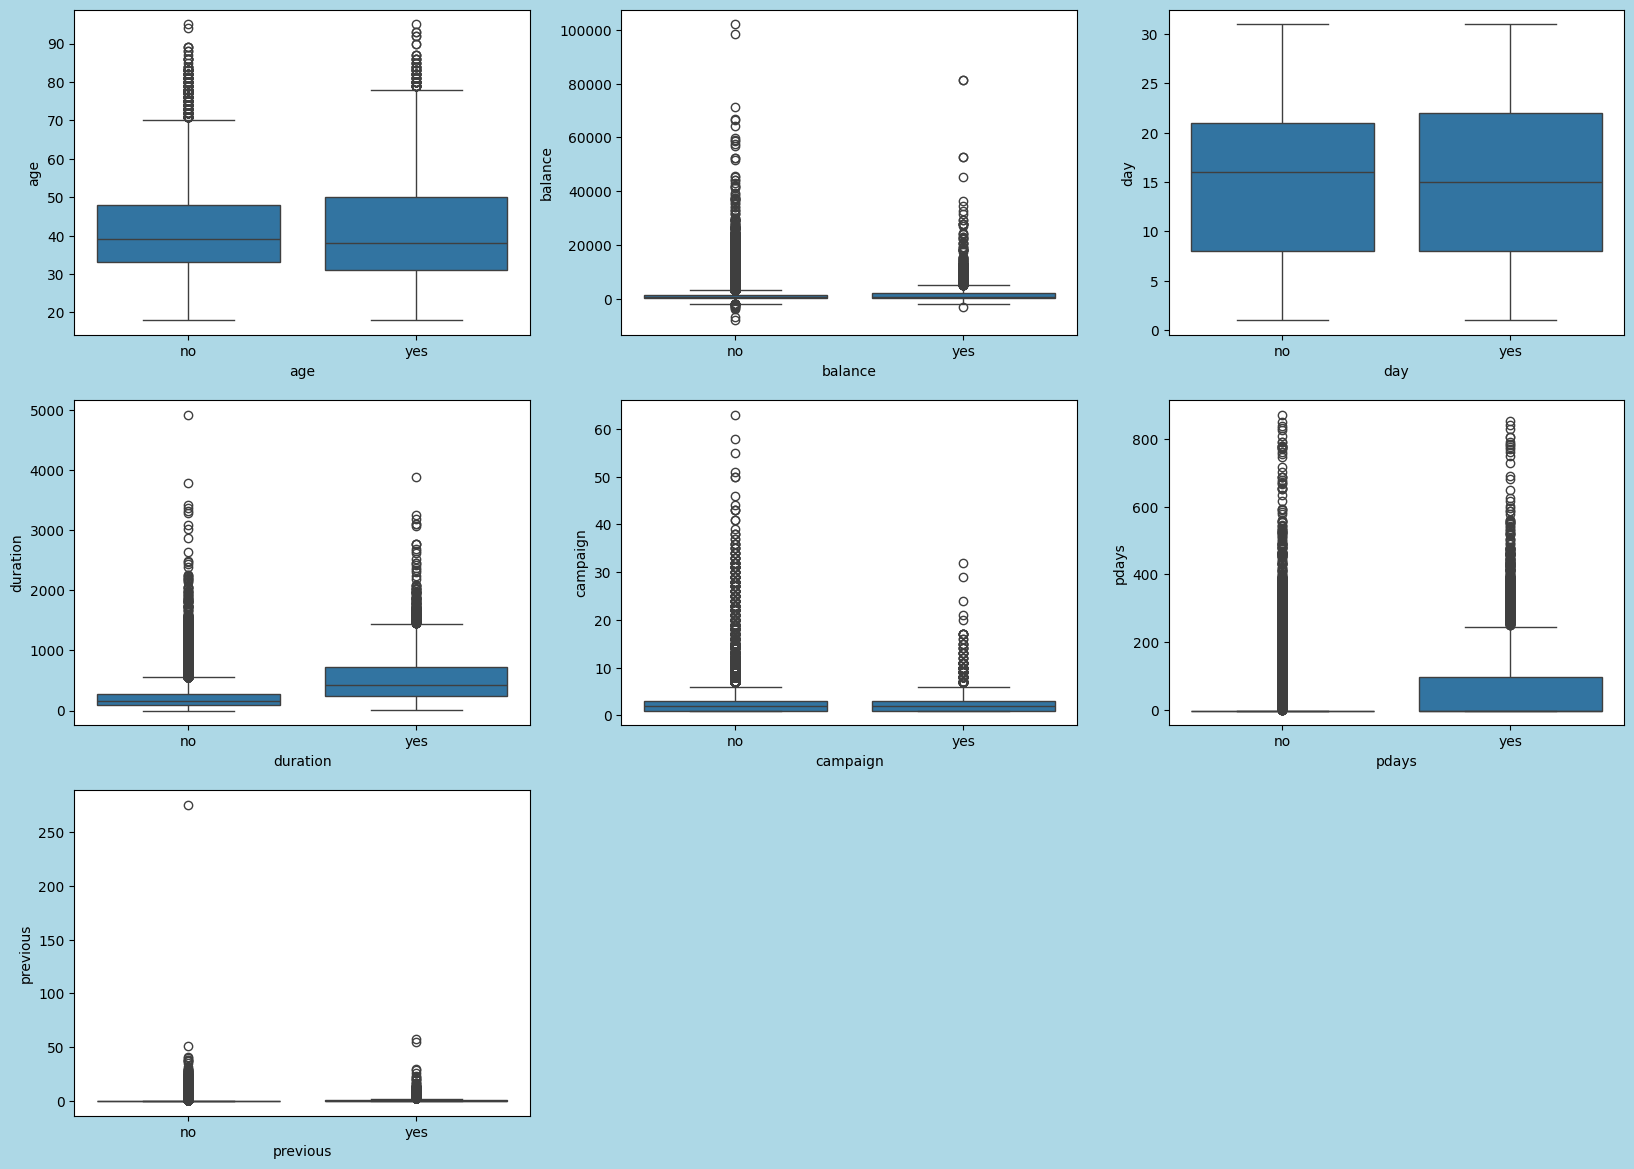

In [9]:
# boxplot que muestra la distribución del target con respecto a las características numéricas, acá target hace referencia a la columna 'y' (si el cliente suscribió un depósito a plazo o no).

plt.figure(figsize=(20,60), facecolor='lightblue')
plotnumber =1
for feature in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

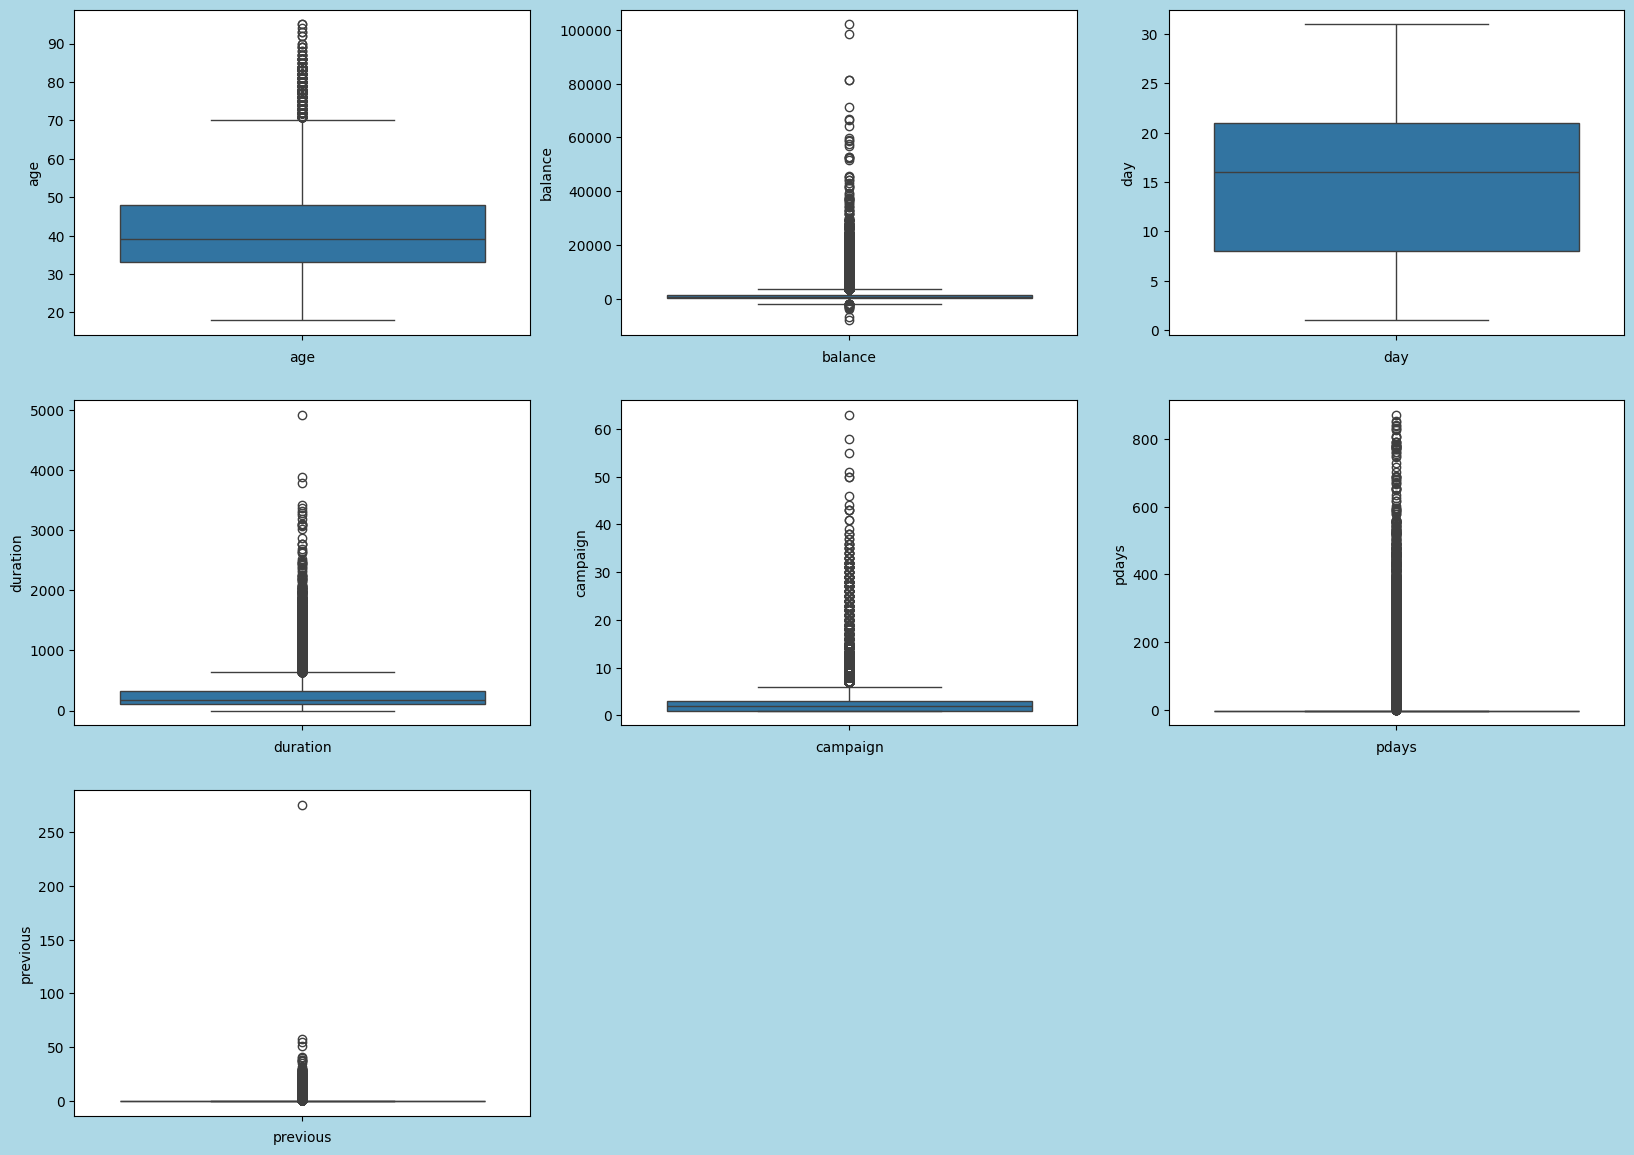

In [10]:
# Grafiquemos los outliers con boxplots para cada variable numérica, para facilitar la visualización realizaremos un loop que genere un boxplot por cada variable numérica. Colocaremos una figura al lado de la otra para facilitar la comparación visual.
#rcParams['figure.figsize'] = 4.5, 3
#num_cols = df.select_dtypes(include=[np.number]).columns
#for col in num_cols:
#    plt.figure()
#    sns.boxplot(x=df[col])
#    plt.xlabel(col)
#    plt.show()

#Si quisiera utilizar subplots para mostrar todos los boxplots en una sola figura, podría hacer algo así:

plt.figure(figsize=(20,60), facecolor='lightblue')
plotnumber = 1
for ind in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[ind])
    plt.xlabel(ind)
    plotnumber+=1
plt.show()



        


## Analisis de correlación entre variables numéricas

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


Text(0.5, 1.0, 'Matriz de Correlación entre Variables Numéricas')

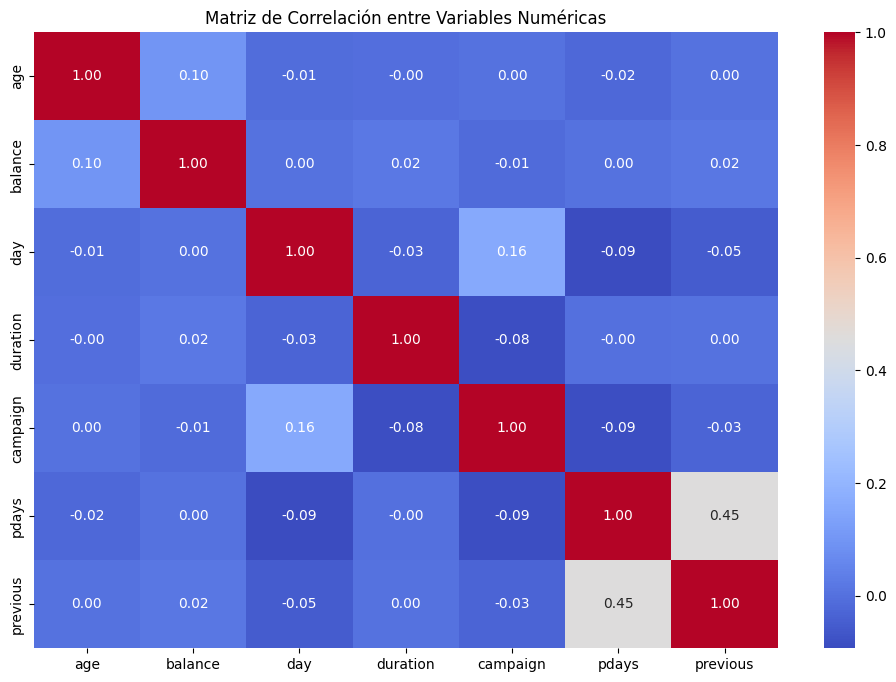

In [11]:
# Analicemos la correlación entre las variables numéricas utilizando la matriz de correlación en base al metodo de Pearson.
print(df[num_cols].corr())

# Graficar la matriz de correlación 
plt.figure(figsize=(12,8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')

### Podemos observar que no hay un alto nivel de relación entre las variables, la unica destacable es la de pdays-previous que es de 0.45 pero es una relacion moderada-baja como para explorar o inferir algo.

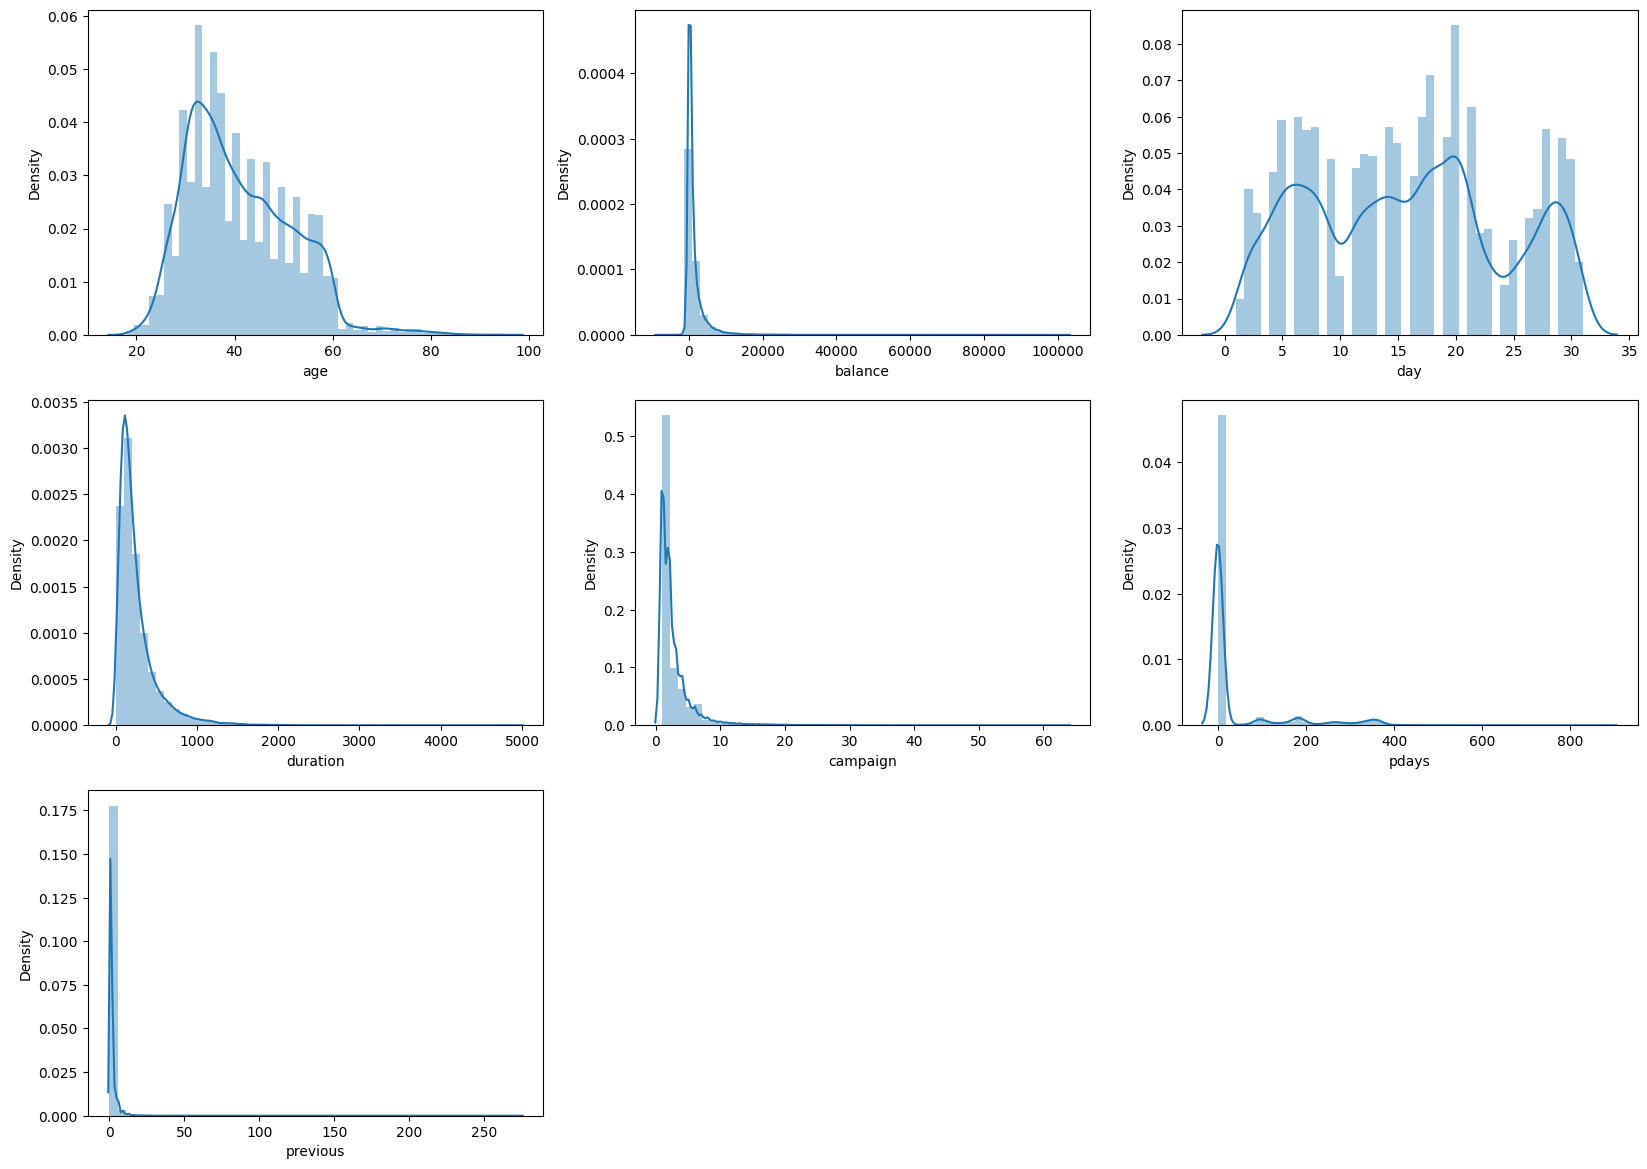

In [13]:
# Distribution of Continous Numerical Features
# plot a univariate distribution of continues observations

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

La variable **age** presenta una mayor concentración de clientes en edades medias (aproximadamente entre 30 y 45 años), y una ligera asimetría hacia valores altos, lo que indica una menor proporción de clientes de mayor edad (mayores de 60 años).

El **balance** muestra una distribución fuertemente asimétrica positiva, con una alta densidad alrededor de valores cercanos a cero y una cola larga hacia valores positivos.

La variable **day** presenta una distribución multimodal, reflejando que los contactos se concentran en ciertos días específicos del mes, lo que podría estar asociado a estrategias operativas de las campañas.

En cuanto a **duration**, se observa una fuerte concentración en valores bajos, indicando que la mayoría de las llamadas son breves, mientras que pocas interacciones prolongadas concentran valores extremos.

Las variables **campaign**, **pdays** y **previous** presentan distribuciones altamente sesgadas, con una gran concentración en valores bajos o cercanos a cero. Esto sugiere que la mayoría de los clientes fueron contactados pocas veces o no tenían contactos previos recientes, mientras que un número reducido presenta valores significativamente mayores.

En conjunto, estas distribuciones evidencian la presencia de asimetrías, valores extremos y posibles subpoblaciones, aspectos clave a considerar en el preprocesamiento y modelado predictivo posterior.


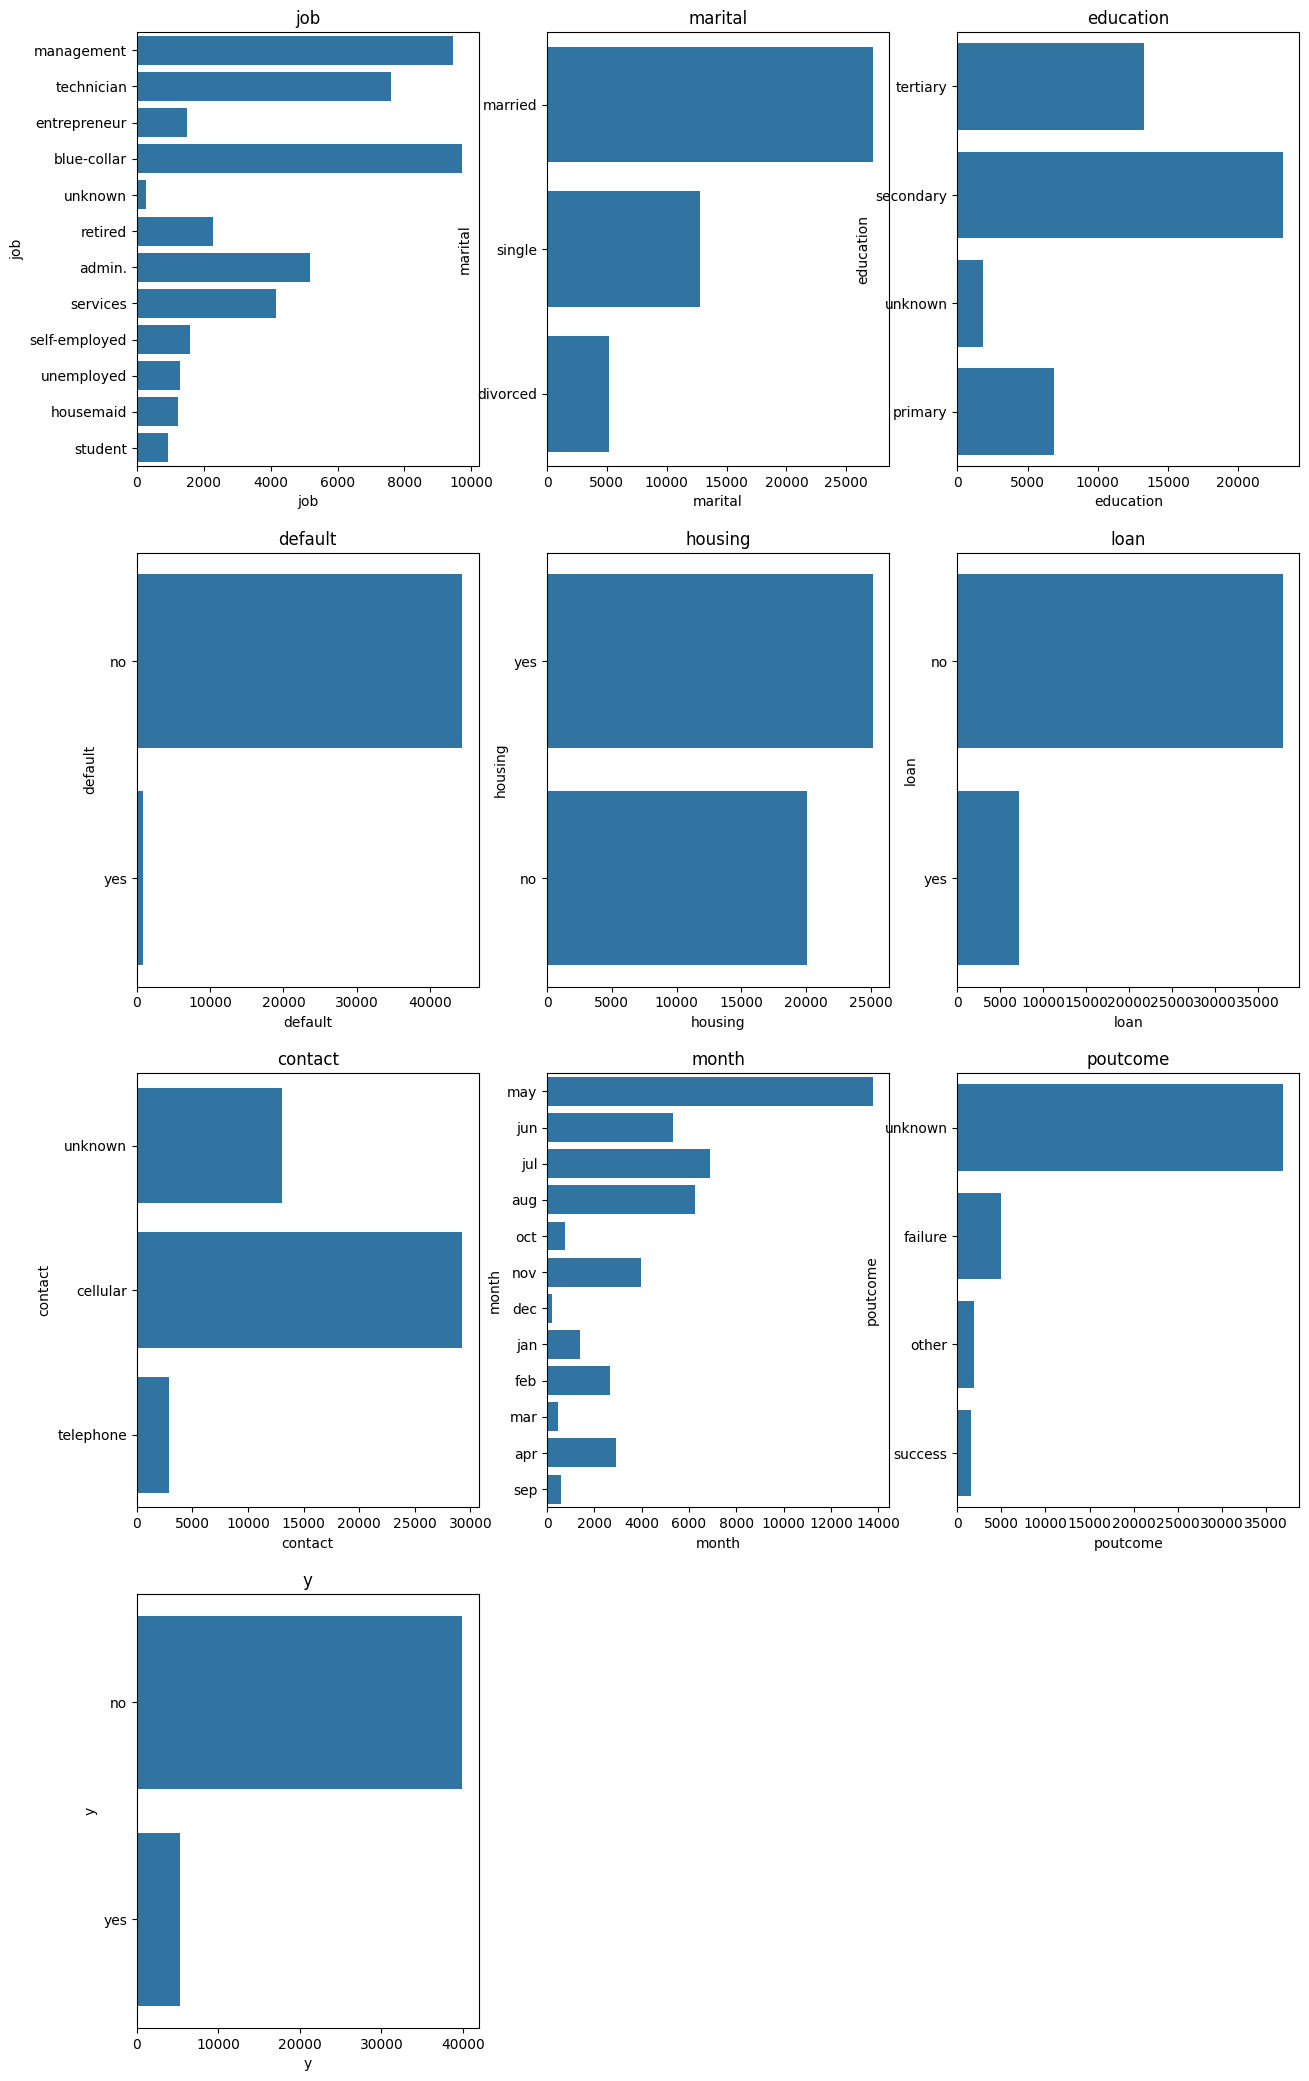

In [14]:
# check count based on categorical features

cat_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cat_features in cat_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_features,data=df)
    plt.xlabel(cat_features)
    plt.title(cat_features)
    plotnumber+=1
plt.show()

El análisis de las variables categóricas revela una marcada concentración en determinadas categorías, lo que permite caracterizar el perfil predominante de los clientes incluidos en el dataset.

En la variable **job**, se observa una mayor presencia de clientes pertenecientes a los sectores *blue-collar*, *management* y *technician*, mientras que categorías como *student*, *housemaid* y *unemployed* presentan una representación considerablemente menor.

Respecto al estado civil (**marital**), la mayoría de los clientes se encuentra casados, seguida por clientes solteros, mientras que el grupo de divorciados es minoritario.

En **education**, predomina el nivel *secondary*, seguido por *tertiary*, lo que sugiere que la mayoría de los clientes cuenta con educación media o superior. La categoría *unknown* presenta una baja frecuencia.

La variable **default** muestra un fuerte desbalance hacia la categoría *no*, indicando que la gran mayoría de los clientes no presenta incumplimientos crediticios previos.

En cuanto a **housing** y **loan**, se observa que una proporción significativa de los clientes posee préstamo hipotecario, mientras que una minoría cuenta con préstamos personales.

La variable **contact** indica que el canal predominante de contacto es *cellular*, seguido por *unknown*, siendo *telephone* el menos utilizado.

El análisis temporal de **month** muestra que los contactos se concentran principalmente en ciertos meses, especialmente *may*, lo que sugiere patrones estacionales en la ejecución de las campañas.

Finalmente, en **poutcome**, la categoría *unknown* domina ampliamente, reflejando que la mayoría de los clientes no participó o no tiene información registrada de campañas previas, mientras que los casos de *success* y *failure* son minoritarios.

La variable objetivo **y** presenta un fuerte desbalance, con una mayoría de clientes que no suscribieron el depósito, aspecto clave a considerar en el modelado posterior.


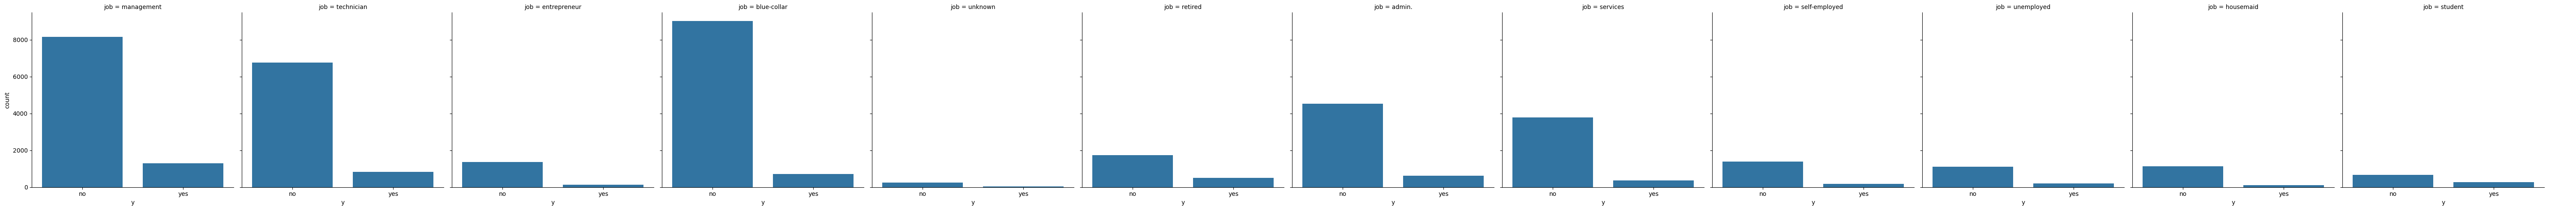

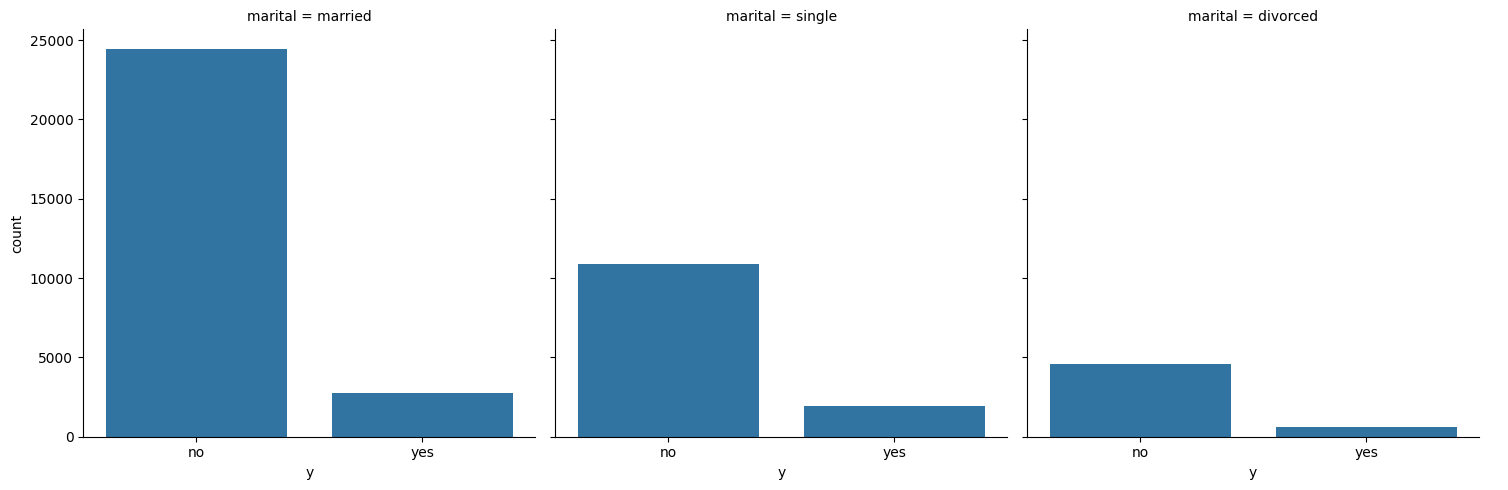

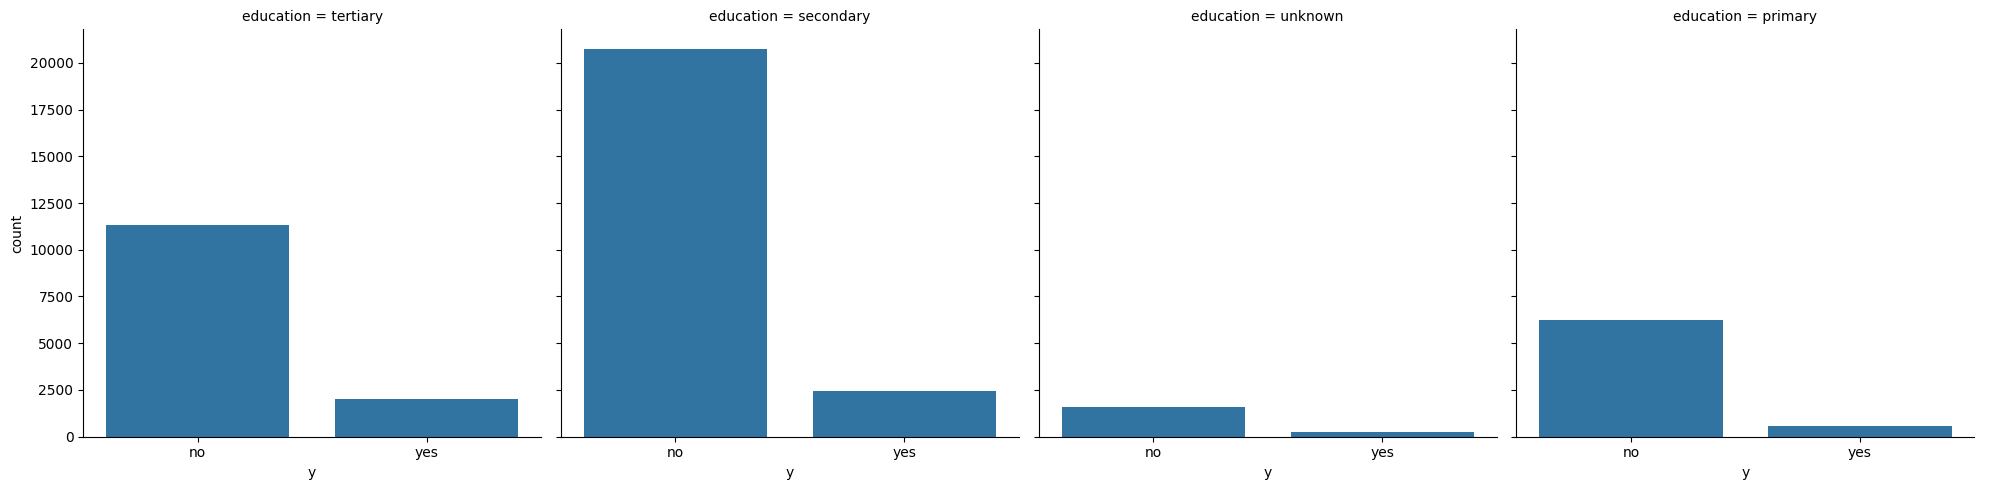

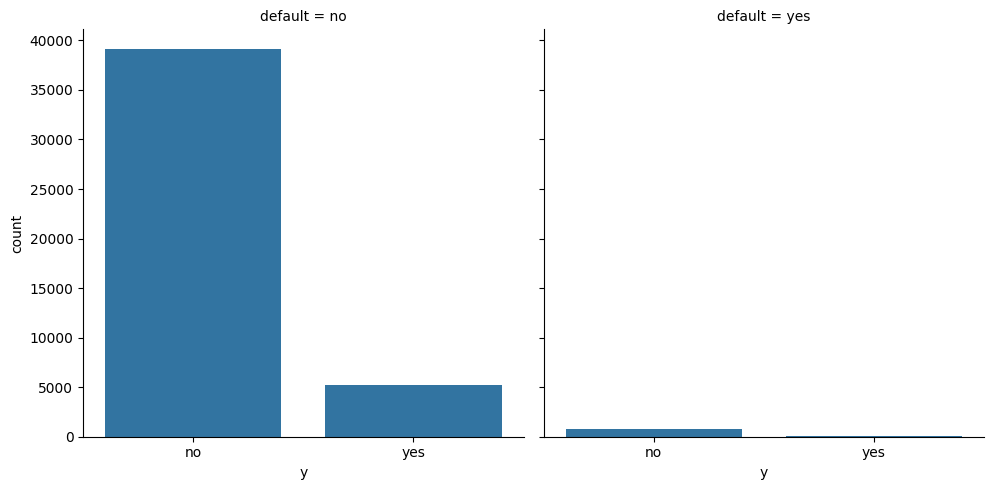

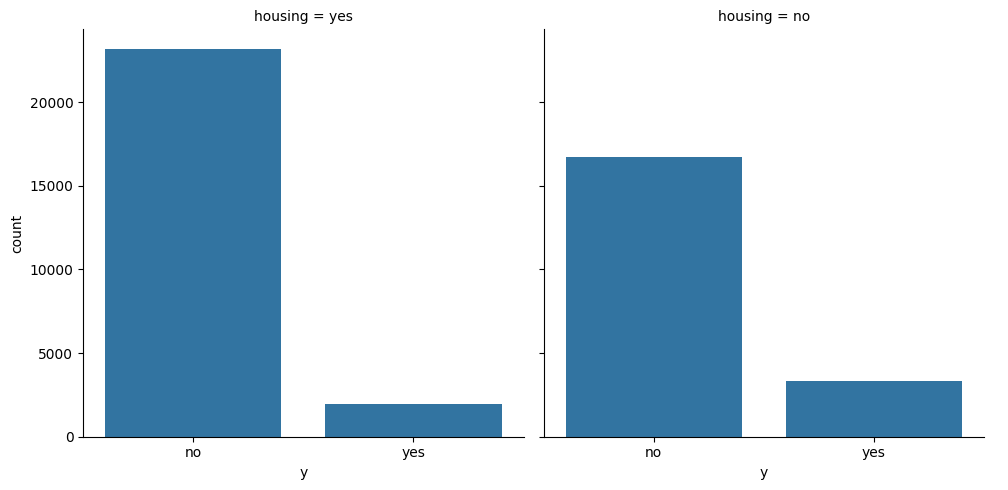

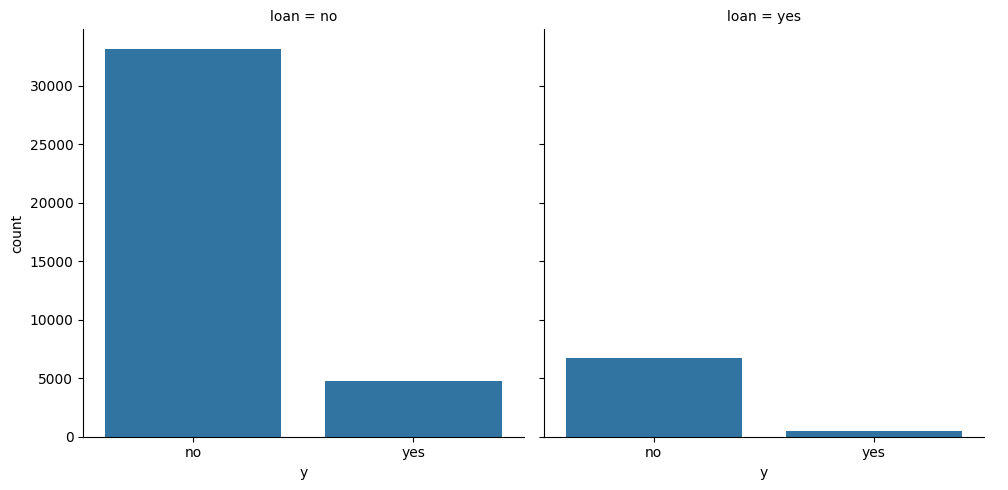

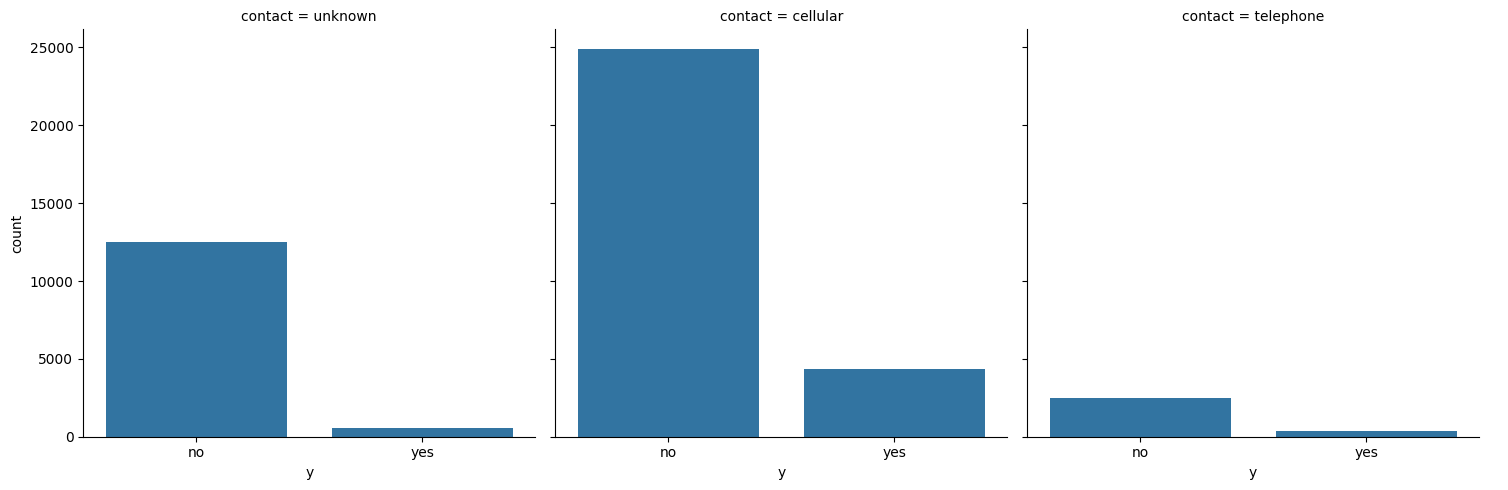

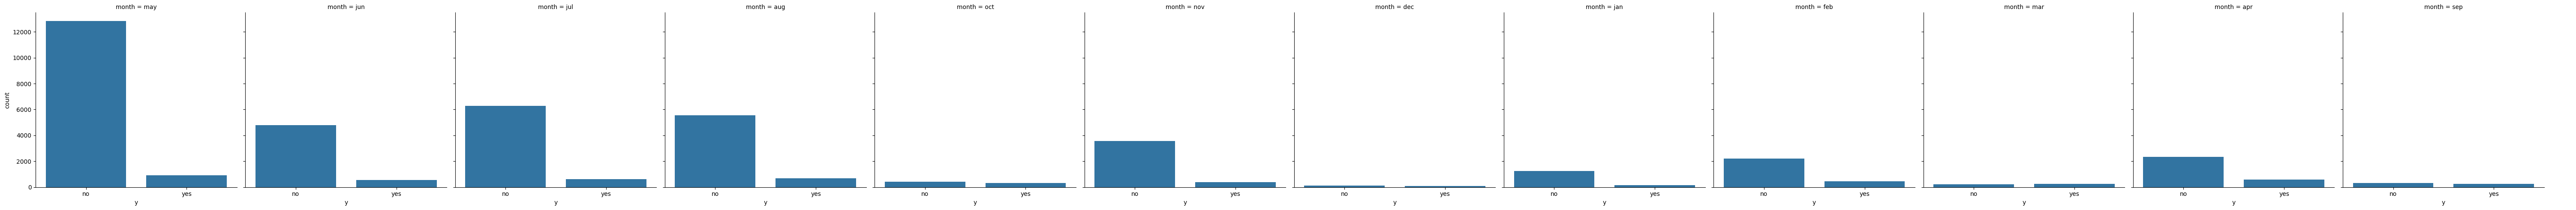

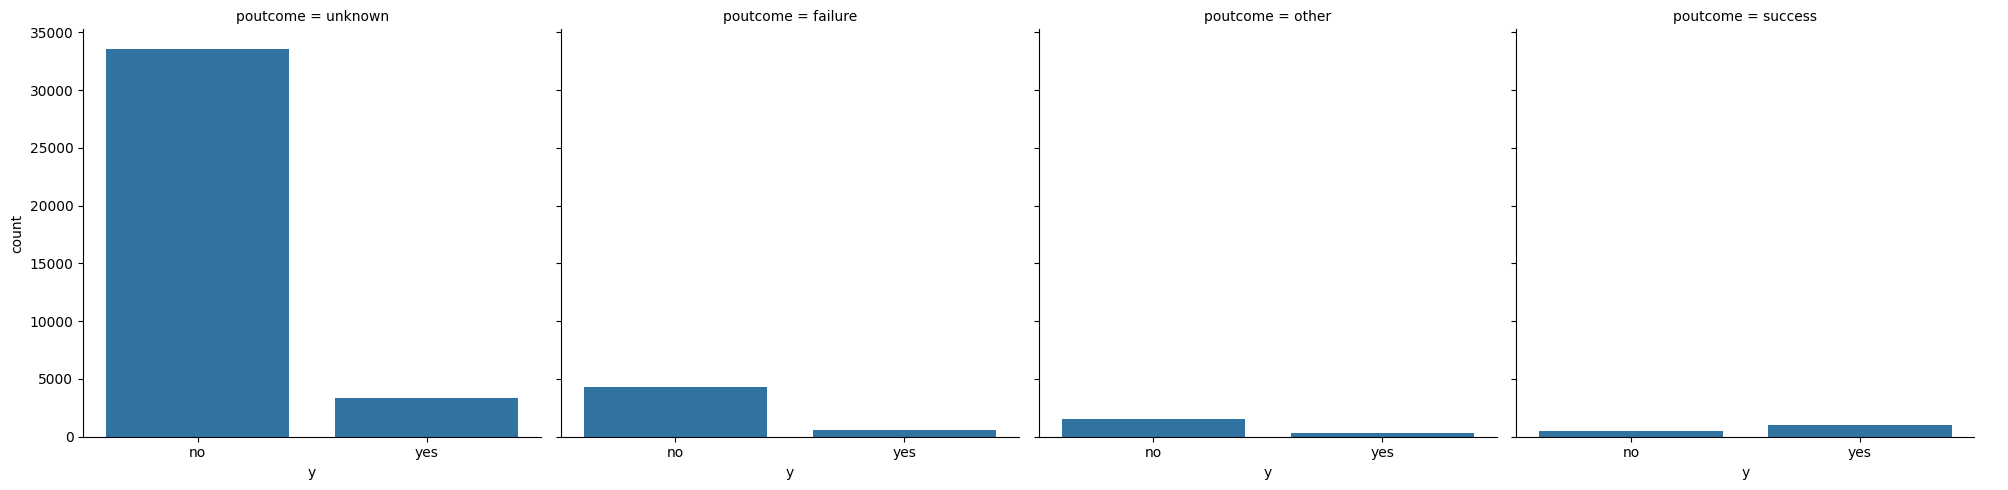

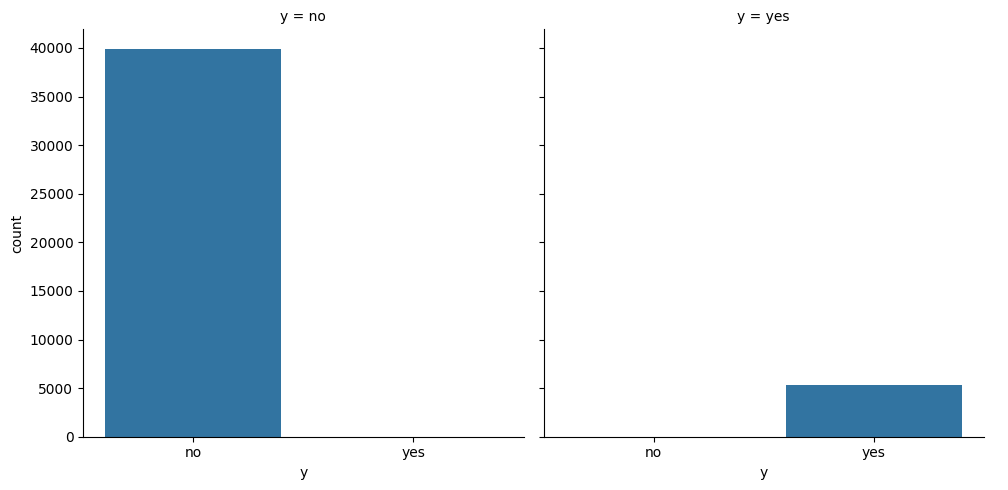

In [15]:
# check target label split over categorical features
# Finding out the relationship between categorical variable and dependent variable
cat_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for cat_features in cat_features:
    sns.catplot(x='y', col=cat_features, kind='count', data= df)
plt.show()

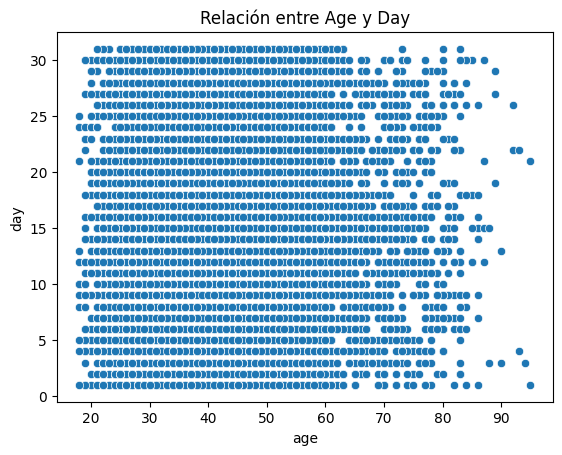

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión
sns.scatterplot(data=df, x="age", y="day")
plt.title('Relación entre Age y Day')
plt.show()

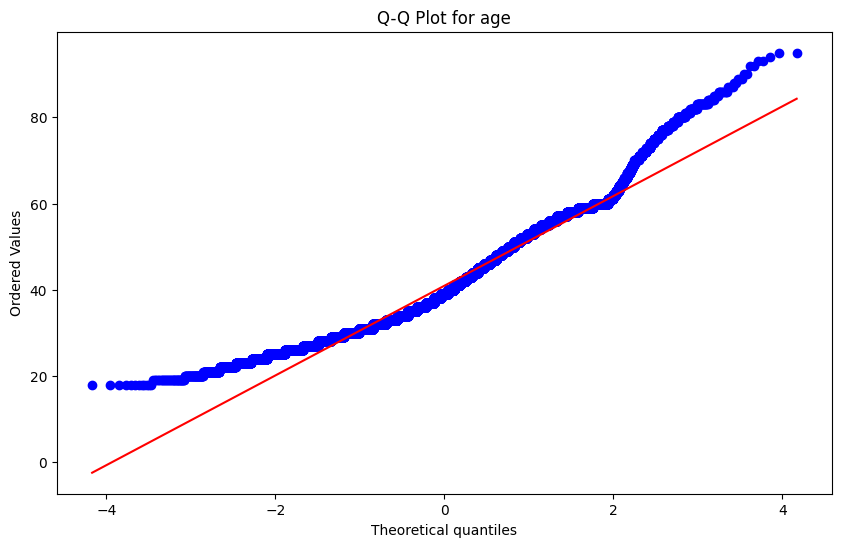

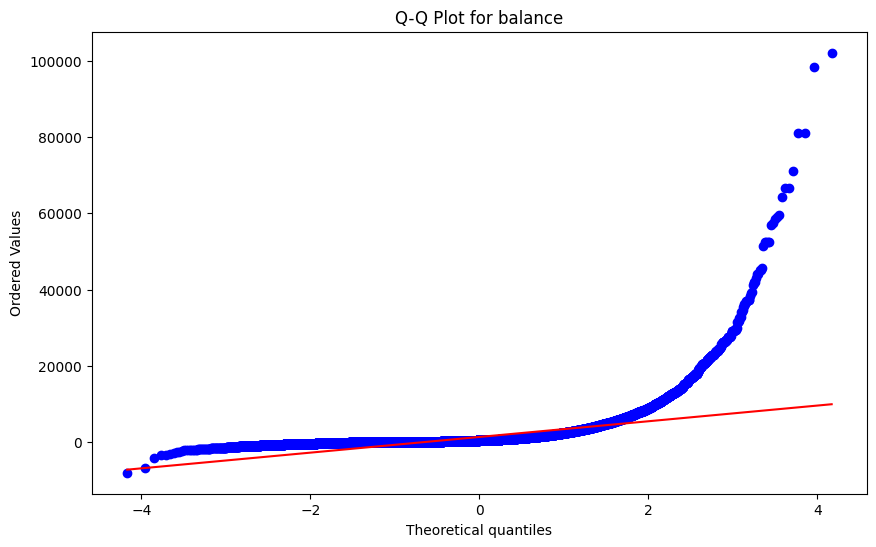

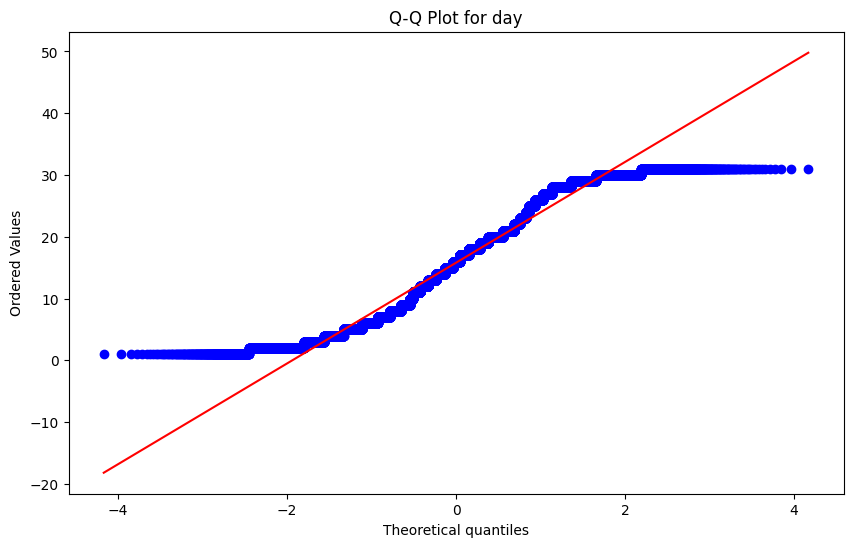

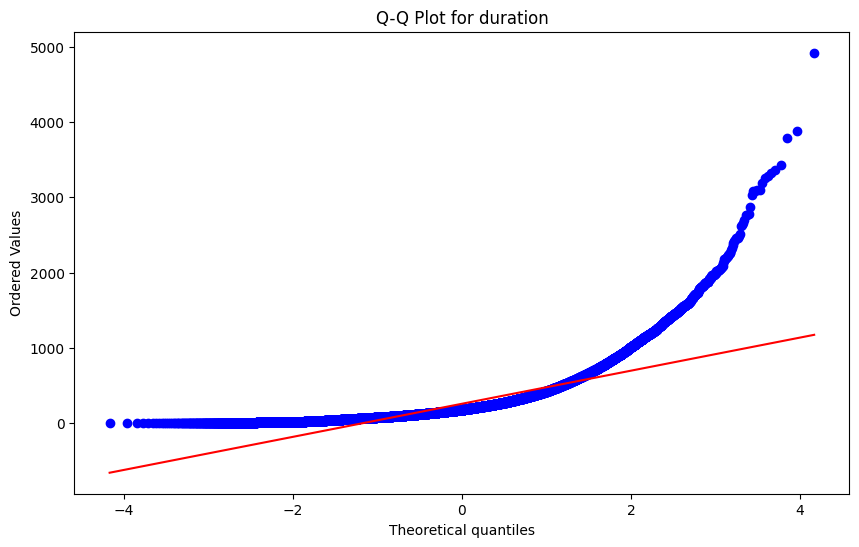

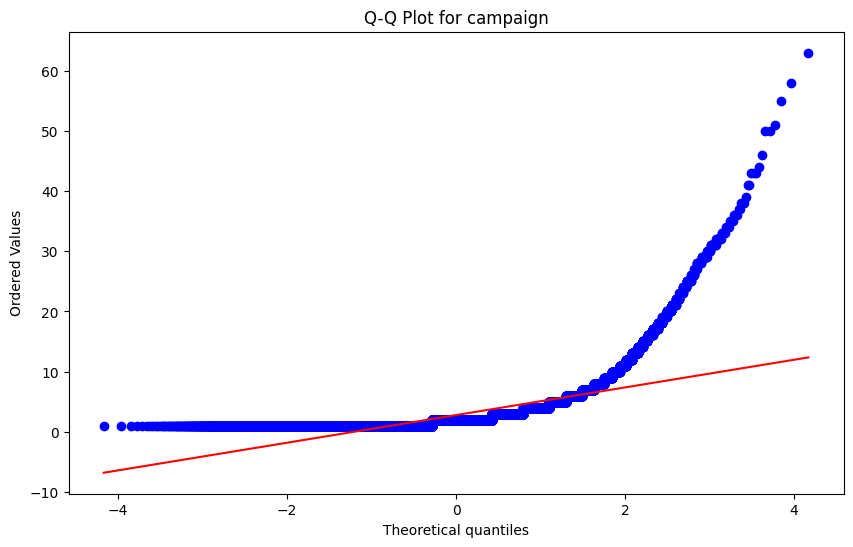

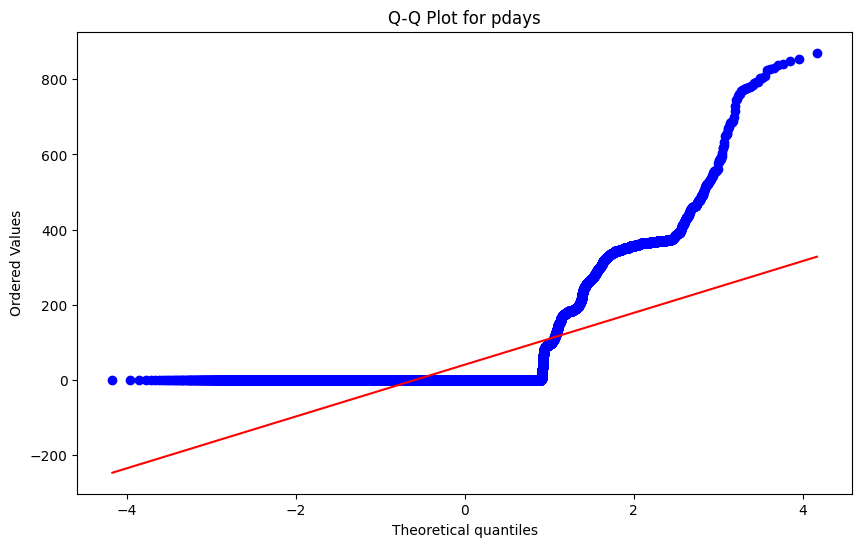

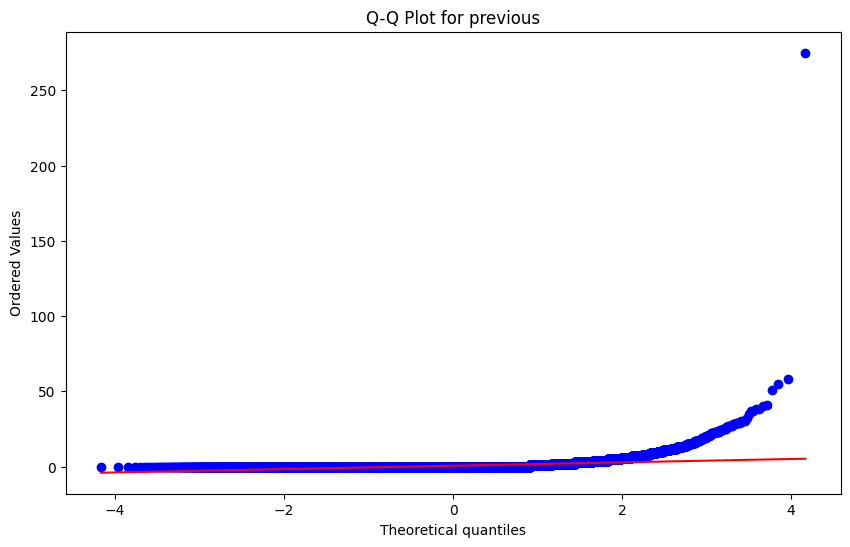

In [17]:
num_features=['age', 'balance', 'day', 'duration','campaign', 'pdays', 'previous']
for num_features in num_features:
    plt.rcParams["figure.figsize"] = (10, 6)
    scipy.stats.probplot(df[num_features], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {num_features}')
    plt.show()
    

In [18]:
# Check target label split over categorical features and find the count

print(df.y.value_counts().to_frame(name='Cantidad'))


# Reportar el porcentaje de clientes que suscribieron un depósito a plazo fijo (target variable 'y' = 'yes') frente a los que no lo hicieron ('y' = 'no').
df.y.value_counts(normalize=True).to_frame(name='Porcentaje')

     Cantidad
y            
no      39922
yes      5289


,Porcentaje
y,
no,0.883015
yes,0.116985


### Antes de aplicar los modelos de aprendizaje automático debemos realizar una codificación de las variables categóricas, es decir asignarles valores numéricos adecuados, para ello utilizaremos ordinal encoding, es decir codificar y ranquear los datos. 

In [19]:
label_encoding = {
    "y":{"no":0,"yes":1},
    "poutcome":{"unknown":0,"failure":1,"other":2,"success":3},
    "month":{"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11},
    "contact":{"unknown":0,"cellular":1,"telephone":2},
    "loan":{"no":0,"yes":1},
    "housing":{"no":0,"yes":1},
    "default":{"no":0,"yes":1},
    "education":{"tertiary":3,"secondary":2,"unknown":0,"primary":1},
    "marital":{"married":1,"single":0,"divorced":2},   
    "job":{"management":0,"technician":1,"entrepreneur":2,"blue-collar":3,"unknown":4,"retired":5,"admin.":6,"services":7,"self-employed":8,"unemployed":9,"housemaid":10,"student":11}
}
df_new = df.replace(label_encoding)
df_new.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,3,0,2143,1,0,0,5,4,261,1,-1,0,0,0
1,44,1,0,2,0,29,1,0,0,5,4,151,1,-1,0,0,0
2,33,2,1,2,0,2,1,1,0,5,4,76,1,-1,0,0,0
3,47,3,1,0,0,1506,1,0,0,5,4,92,1,-1,0,0,0
4,33,4,0,0,0,1,0,0,0,5,4,198,1,-1,0,0,0
5,35,0,1,3,0,231,1,0,0,5,4,139,1,-1,0,0,0
6,28,0,0,3,0,447,1,1,0,5,4,217,1,-1,0,0,0
7,42,2,2,3,1,2,1,0,0,5,4,380,1,-1,0,0,0
8,58,5,1,1,0,121,1,0,0,5,4,50,1,-1,0,0,0
9,43,1,0,2,0,593,1,0,0,5,4,55,1,-1,0,0,0


### Ahora veamos la correlacion entre la varibale target Y respecto a las variables de df_new

In [20]:
#Vector y Matriz de correlación con las variables categóricas ya codificadas y la variable objetivo 'y'
#plt.figure(figsize=(14,10))
#correlation_matrix = df_new.corr()
correlation_vector = df_new.corr()['y']
print(correlation_vector)
#sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
#plt.title('Matriz de Correlación con Variables Categóricas Codificadas y Variable Objetivo y')

age          0.025155
job          0.022396
marital     -0.045588
education    0.051341
default     -0.022419
balance      0.052838
housing     -0.139173
loan        -0.068185
contact      0.130590
day         -0.028348
month        0.018717
duration     0.394521
campaign    -0.073172
pdays        0.103621
previous     0.093236
poutcome     0.259315
y            1.000000
Name: y, dtype: float64


### No se observa una alta relación entre las variables y la variable objetivo Y

## Ahora realicemos un escalamineto de las variables numéricas, pero debido a que algunas como por ejemplo  balance o duration tienen demasiados valores outliers, es conveniente realizar un clipping previo al escalamineto MinMax

In [27]:
def aplicar_minmax_sin_problemas_pdays_previous(X_train, X_val, X_test):
    """MinMax sin clipping para pdays y previous, con clipping para otras"""
    from sklearn.preprocessing import MinMaxScaler
    import numpy as np
    
    X_train_final = X_train.copy()
    X_val_final = X_val.copy()
    X_test_final = X_test.copy()
    
    # Columnas para aplicar clipping
    cols_con_clipping = ['age', 'balance', 'day', 'duration', 'campaign']
    
    for col in cols_con_clipping:
        if col in X_train.columns:
            # Clipping percentil 1-99
            lower = np.percentile(X_train[col], 1)
            upper = np.percentile(X_train[col], 99)
            
            X_train_final[col] = X_train[col].clip(lower, upper)
            X_val_final[col] = X_val[col].clip(lower, upper)
            X_test_final[col] = X_test[col].clip(lower, upper)
    
    # Escalar todo con MinMax
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Todas las columnas numéricas (incluyendo pdays y previous sin clipping)
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns
    
    X_train_final[numeric_cols] = scaler.fit_transform(X_train_final[numeric_cols])
    X_val_final[numeric_cols] = scaler.transform(X_val_final[numeric_cols])
    X_test_final[numeric_cols] = scaler.transform(X_test_final[numeric_cols])
    
    return X_train_final, X_val_final, X_test_final, scaler

# PRIMERO necesitas definir X_train, X_val, X_test
# Asumo que ya lo hiciste antes, pero lo repito por seguridad:
from sklearn.model_selection import train_test_split

X = df_new.drop('y', axis=1)
y = df_new['y']

# Separación 70/15/15
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# AHORA aplicar escalado
X_train_scaled, X_val_scaled, X_test_scaled, scaler = aplicar_minmax_sin_problemas_pdays_previous(
    X_train, X_val, X_test
)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_val_scaled shape: {X_val_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# Crear df_new2 para referencia (opcional)
X_combined = pd.concat([X_train_scaled, X_val_scaled, X_test_scaled])
X_combined = X_combined.sort_index()

num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df_new2 = X_combined[num_features].copy()

print(f"Shape: {df_new2.shape}")
print(df_new2.head())

X_train_scaled shape: (31647, 16)
X_val_scaled shape: (6782, 16)
X_test_scaled shape: (6782, 16)
Shape: (45211, 7)
        age   balance       day  duration  campaign  pdays  previous
0  0.729167  0.200972  0.103448  0.197916       0.0    0.0       0.0
1  0.437500  0.047595  0.103448  0.110833       0.0    0.0       0.0
2  0.208333  0.045636  0.103448  0.051458       0.0    0.0       0.0
3  0.500000  0.154756  0.103448  0.064125       0.0    0.0       0.0
4  0.208333  0.045563  0.103448  0.148041       0.0    0.0       0.0


In [28]:
print(df_new.head())
print(df.head())
print(df_new.info())
print(df_new2.info())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    0        1          3        0     2143        1     0        0   
1   44    1        0          2        0       29        1     0        0   
2   33    2        1          2        0        2        1     1        0   
3   47    3        1          0        0     1506        1     0        0   
4   33    4        0          0        0        1        0     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      4       261         1     -1         0         0  0  
1    5      4       151         1     -1         0         0  0  
2    5      4        76         1     -1         0         0  0  
3    5      4        92         1     -1         0         0  0  
4    5      4       198         1     -1         0         0  0  
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes  

### Veamos si podemos aplicar un Oversampling, para ello calculemos el balance ratio entre la cantidad de clientes que dicen que si y la cantidada que dicen que no, es decir por cada y = yes cuántos y = no hay, si el ratio es mayor a 5:1 realizamos oversampling 

ANÁLISIS DE DESBALANCE DE CLASES
Distribución de clases:
  Clase 0 ('no'): 39,922 muestras (88.3%)
  Clase 1 ('yes'): 5,289 muestras (11.7%)

Ratio de desbalance: 7.5:1
  (por cada cliente que dice yes, hay 8 que dicen no)

INTERPRETACIÓN DEL DESBALANCE:
DESBALANCE MODERADO (5-10:1) - Over-sampling RECOMENDADO


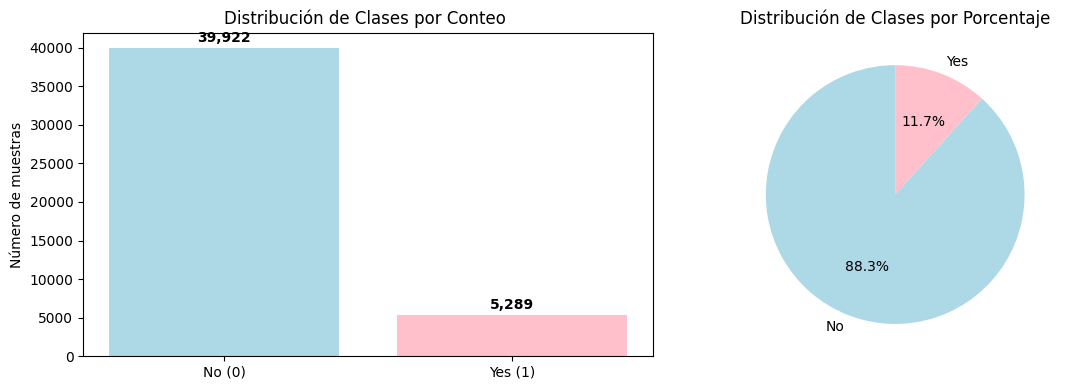

In [29]:
def analizar_desbalance(df, target='y'):
    """Análisis completo del desbalance de clases"""
    print("=" * 80)
    print("ANÁLISIS DE DESBALANCE DE CLASES")
    print("=" * 80)
    
    # Distribución
    class_dist = df[target].value_counts()
    class_percent = df[target].value_counts(normalize=True) * 100

    print(f"Distribución de clases:")
    print(f"  Clase 0 ('no'): {class_dist[0]:,} muestras ({class_percent[0]:.1f}%)")
    print(f"  Clase 1 ('yes'): {class_dist[1]:,} muestras ({class_percent[1]:.1f}%)")
    
    # Ratio de desbalance
    imbalance_ratio = class_dist[0] / class_dist[1]
    print(f"\nRatio de desbalance: {imbalance_ratio:.1f}:1")
    print(f"  (por cada cliente que dice yes, hay {imbalance_ratio:.0f} que dicen no)")
    
    # Reglas generales
    print(f"\nINTERPRETACIÓN DEL DESBALANCE:")
    if imbalance_ratio > 20:
        print("DESBALANCE EXTREMO (>20:1) - Over-sampling CRÍTICO")
    elif imbalance_ratio > 10:
        print("DESBALANCE ALTO (10-20:1) - Over-sampling MUY RECOMENDADO")
    elif imbalance_ratio > 5:
        print("DESBALANCE MODERADO (5-10:1) - Over-sampling RECOMENDADO")
    
    # Visualización
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Gráfico 1: Barras
    axes[0].bar(['No (0)', 'Yes (1)'], class_dist.values, color=['lightblue', 'pink'])
    axes[0].set_title('Distribución de Clases por Conteo ')
    axes[0].set_ylabel('Número de muestras')
    
    # Añadir valores en barras
    for i, v in enumerate(class_dist.values):
        axes[0].text(i, v + class_dist.max()*0.01, f'{v:,}', 
                    ha='center', va='bottom', fontweight='bold')
    
    # Gráfico 2: Pie
    axes[1].pie(class_dist.values, labels=['No', 'Yes'], 
               autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90)
    axes[1].set_title('Distribución de Clases por Porcentaje')
    
    plt.tight_layout()
    plt.show()
    
    return class_dist, imbalance_ratio

# Ejecutar análisis
class_dist, imbalance_ratio = analizar_desbalance(df_new, 'y')

In [ ]:
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter
# Solo aplicamos SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train_scaled, y_train)

print("The number of Classes before fit {}".format(Counter(y_train)))
print("The number of Classes after fit {}".format(Counter(y_train_os)))
print(f"\nShape antes de SMOTE: {X_train_scaled.shape}")
print(f"Shape después de SMOTE: {X_train_os.shape}")


[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
The number of Classes before fit Counter({0: 27945, 1: 3702})
The number of Classes after fit Counter({0: 27945, 1: 27945})

Shape antes de SMOTE: (31647, 16)
Shape después de SMOTE: (55890, 16)


In [32]:
print(X_train)
print(y_train)
print(y_train_os.value_counts())

       age  job  marital  education  default  balance  housing  loan  contact  \
13382   31    7        1          2        0        1        1     0        1   
32641   35    7        1          2        0      195        1     0        1   
3991    24    3        0          2        0       77        1     0        0   
8068    35    3        1          2        0       80        1     1        0   
27484   37    7        0          2        0      105        0     1        1   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
16952   45    3        1          2        0       79        1     0        1   
6317    30    3        1          2        0     1196        0     0        0   
34781   27    0        0          3        0     2559        1     0        1   
13679   32   10        1          1        0        0        1     0        1   
3184    40    7        1          2        0      581        1     0        0   

       day  month  duration

In [33]:
print('not_deposited :'  , y_train_os.value_counts()[0]/len(y_train_os)*100,'%')
print('deposited: ' , y_train_os.value_counts()[1]/len(y_train_os)*100,'%')

not_deposited : 50.0 %
deposited:  50.0 %


### Cross-Validation: Lo utilizamos para estimar el rendimiento de los modelos de aprendizaje automático.

In [34]:
# Celda 5 - Validación cruzada (CORREGIR)
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(random_state=40)
scores = cross_val_score(model, X_train_os, y_train_os, cv=skfold)
print(f"Validación cruzada:")
print(f"Scores: {scores}")
print(f"Media: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

Validación cruzada:
Scores: [0.91277509 0.91805332 0.91080694 0.9120594  0.90910717]
Media: 0.9126 ± 0.0030


## Primer método:  DescisionTree Classifier- Clasificador arbol de decisión:


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

desiciontree_model = DecisionTreeClassifier(max_depth=10, random_state=40)
desiciontree_model.fit(X_train_os, y_train_os)

# Predecir en VALIDATION (no test aún)
y_pred_val = desiciontree_model.predict(X_val_scaled)

print("✅ Decision Tree - Evaluación en Validation Set:")
print(f"Accuracy:  {metrics.accuracy_score(y_val, y_pred_val):.4f}")
print(f"Precision: {metrics.precision_score(y_val, y_pred_val):.4f}")
print(f"Recall:    {metrics.recall_score(y_val, y_pred_val):.4f}")

✅ Decision Tree - Evaluación en Validation Set:
Accuracy:  0.8689
Precision: 0.4629
Recall:    0.7456


## Logistic Regression: 
```La regresión logística es un algoritmo de clasificación de aprendizaje automático que se utiliza para predecir la probabilidad de una variable dependiente categórica.```

In [ ]:
from sklearn.linear_model import LogisticRegression
modelreg=LogisticRegression(C=10, random_state = 40) 
modelreg.fit(X_train_os,y_train_os)
ypred=modelreg.predict(X_test_scaled)
ypred

modelreg.score(X_test_scaled,y_test)
X_test_scaled.shape
y_test.shape

(6782,)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
print("Precision:",metrics.precision_score(y_test, ypred))
print("Recall:",metrics.recall_score(y_test, ypred))

Accuracy: 0.8190799174284872
Precision: 0.36959134615384615
Recall: 0.7755359394703657


In [ ]:
cm=confusion_matrix(y_test,ypred)
cm

array([[4940, 1049],
       [ 178,  615]])

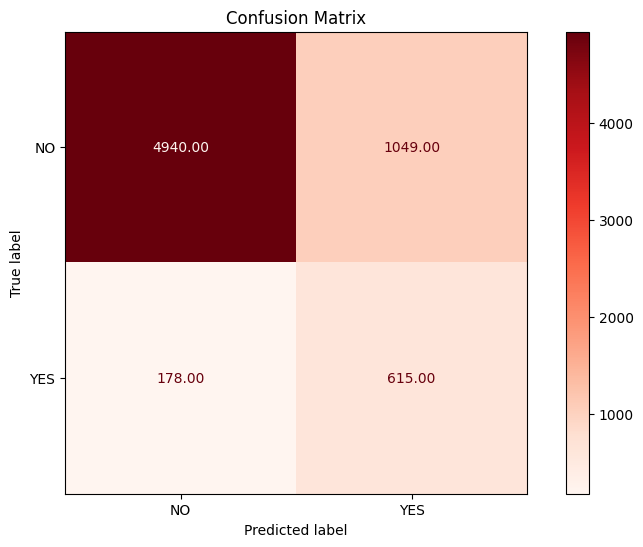

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(
    modelreg, 
    X_test_scaled, 
    y_test,
    display_labels=["NO", "YES"],
    cmap=plt.cm.Reds,
    values_format='.2f'
)

plt.title("Confusion Matrix")
plt.show()

## KNeighborsClassifier:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train_os, y_train_os)
y_predicted_KNN = KNN_model.predict(X_test_scaled)
y_predicted_KNN 

array([0, 0, 1, ..., 0, 0, 0], shape=(6782,))

In [ ]:
KNN_model.score(X_test_scaled,y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_KNN))
print("Precision:",metrics.precision_score(y_test,y_predicted_KNN))
print("Recall:",metrics.recall_score(y_test, y_predicted_KNN))

Accuracy: 0.836773813034503
Precision: 0.3876967095851216
Recall: 0.6834804539722572


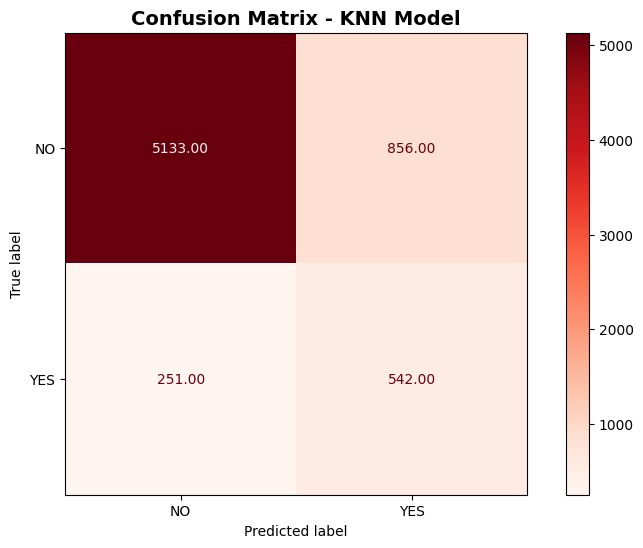

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    KNN_model,
    X_test_scaled,
    y_test,
    display_labels=["NO", "YES"],
    cmap=plt.cm.Reds,
    values_format='.2f'
)

plt.title("Confusion Matrix - KNN Model", fontsize=14, fontweight='bold')
plt.grid(False)
plt.show()

## Naive Bayes: 

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model= GaussianNB()
naive_bayes_model.fit(X_train_os, y_train_os)
y_predicted_naive = naive_bayes_model.predict(X_test_scaled)
y_predicted_naive

array([0, 1, 0, ..., 0, 0, 0], shape=(6782,))

In [ ]:
naive_bayes_model.score(X_test_scaled,y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_naive))
print("Precision:",metrics.precision_score(y_test,y_predicted_naive))
print("Recall:",metrics.recall_score(y_test, y_predicted_naive))

Accuracy: 0.7281038041875553
Precision: 0.27494646680942186
Recall: 0.8095838587641866


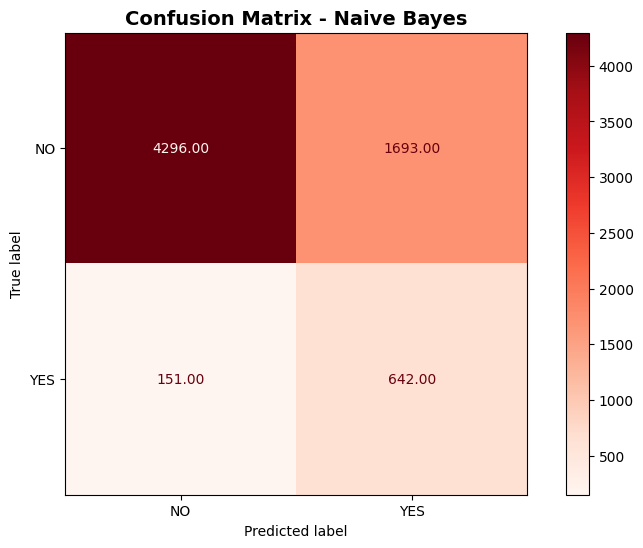

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    naive_bayes_model,
    X_test_scaled,
    y_test,
    display_labels=["NO", "YES"],
    cmap=plt.cm.Reds,
    values_format='.2f'
)

plt.title("Confusion Matrix - Naive Bayes", fontsize=14, fontweight='bold')
plt.show()

## RandomForest: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model= RandomForestClassifier(n_estimators = 10)
randomforest_model.fit(X_train_os, y_train_os)
y_predicted_randomforest = randomforest_model.predict(X_test_scaled)
y_predicted_randomforest

array([0, 0, 0, ..., 0, 0, 0], shape=(6782,))

In [ ]:
randomforest_model.score(X_test_scaled,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_randomforest))
print("Precision:",metrics.precision_score(y_test,y_predicted_randomforest))
print("Recall:",metrics.recall_score(y_test, y_predicted_randomforest))

Accuracy: 0.8917723385432026
Precision: 0.5390728476821192
Recall: 0.5132408575031526


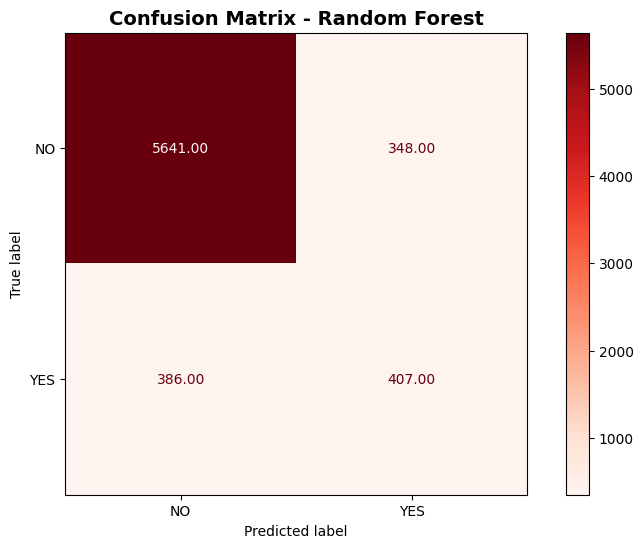

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Reemplaza tu código con esto
ConfusionMatrixDisplay.from_estimator(
    randomforest_model,
    X_test_scaled,
    y_test,
    display_labels=["NO", "YES"],
    cmap=plt.cm.Reds,
    values_format='.2f'
)

plt.title("Confusion Matrix - Random Forest", fontsize=14, fontweight='bold')
plt.show()

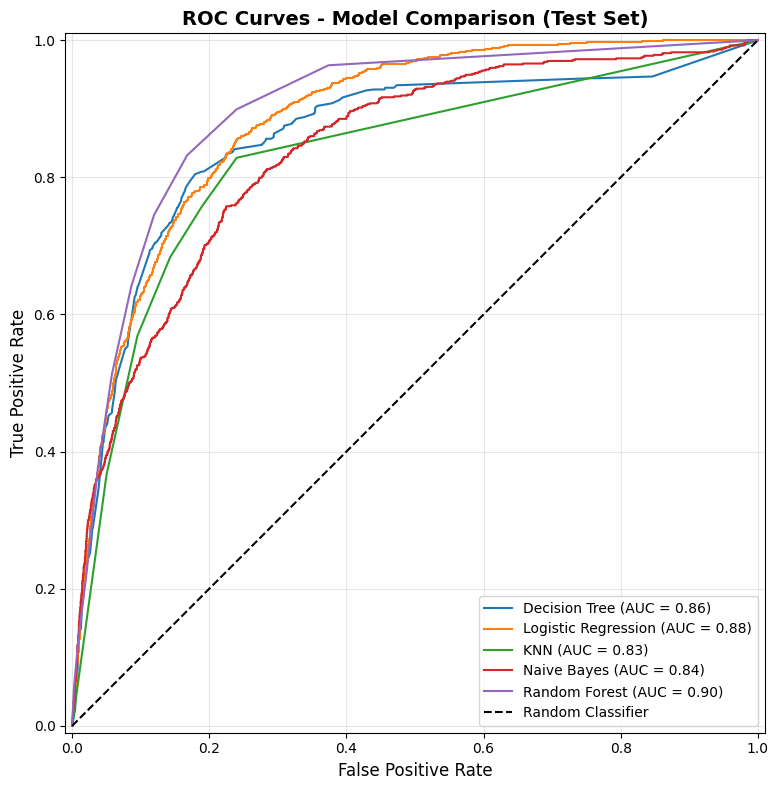

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Lista de modelos entrenados
classifiers = [
    (desiciontree_model, "Decision Tree"),
    (modelreg, "Logistic Regression"),
    (KNN_model, "KNN"),
    (naive_bayes_model, "Naive Bayes"),
    (randomforest_model, "Random Forest")
]

# Crear figura
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Plotear cada curva ROC usando el TEST SET FINAL
for model, name in classifiers:
    RocCurveDisplay.from_estimator(
        model, 
        X_test_scaled,  # ¡TEST FINAL!
        y_test,         # ¡TEST FINAL!
        ax=ax, 
        name=name
    )

# Línea de referencia
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curves - Model Comparison (Test Set)', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

AUC-ROC Score: 0.7276


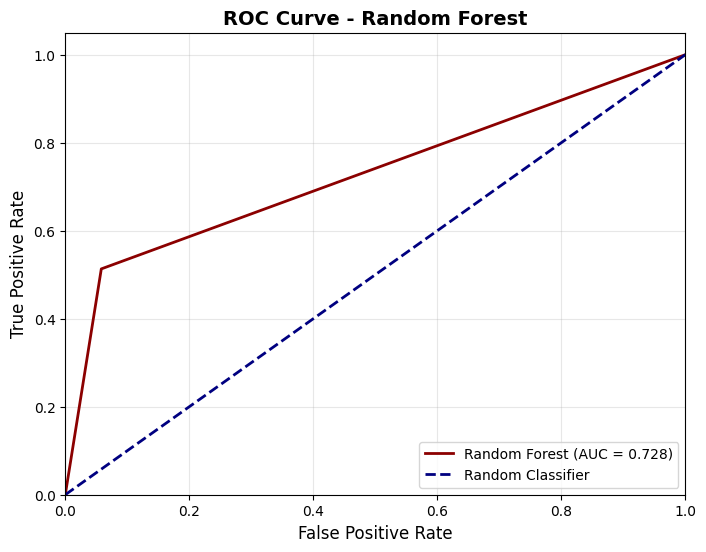


Número de thresholds: 3

Primeros 5 thresholds: [inf  1.  0.]
Últimos 5 thresholds: [inf  1.  0.]


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Calcular AUC-ROC
auc_score = roc_auc_score(y_test, y_predicted_randomforest)
print(f"AUC-ROC Score: {auc_score:.4f}")

# 2. Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_randomforest)

# 3. Mostrar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'Random Forest (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 4. Mostrar algunos thresholds
print(f"\nNúmero de thresholds: {len(thresholds)}")
print(f"\nPrimeros 5 thresholds: {thresholds[:5]}")
print(f"Últimos 5 thresholds: {thresholds[-5:]}")

# Análisis Final

In [ ]:
import pandas as pd
import numpy as np

# Crear DataFrame con tus métricas
df_results = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'K-Nearest Neighbors', 
              'Naive Bayes', 'Random Forest'],
    'Accuracy': [0.8689, 0.8190, 0.8367, 0.7281, 0.8917],
    'Precision': [0.4629, 0.3695, 0.3876, 0.2749, 0.5390],
    'Recall': [0.7456, 0.7755, 0.6834, 0.8095, 0.5132],
})

# Mostrar DataFrame
print("📊 RESULTADOS DE LOS MODELOS")
print("=" * 80)
print(df_results.to_string(index=False))
print("\n" + "=" * 80)

# Calcular promedios
print("\n📈 ESTADÍSTICAS PROMEDIO:")
for metric in ['Accuracy', 'Precision', 'Recall']:
    if metric in df_results.columns:
        print(f"{metric:12}: {df_results[metric].mean():.4f} ± {df_results[metric].std():.4f}")

📊 RESULTADOS DE LOS MODELOS
              Model  Accuracy  Precision  Recall
      Decision Tree    0.8689     0.4629  0.7456
Logistic Regression    0.8190     0.3695  0.7755
K-Nearest Neighbors    0.8367     0.3876  0.6834
        Naive Bayes    0.7281     0.2749  0.8095
      Random Forest    0.8917     0.5390  0.5132


📈 ESTADÍSTICAS PROMEDIO:
Accuracy    : 0.8289 ± 0.0630
Precision   : 0.4068 ± 0.0997
Recall      : 0.7054 ± 0.1170


Text(0, 0.5, 'Accuracy')

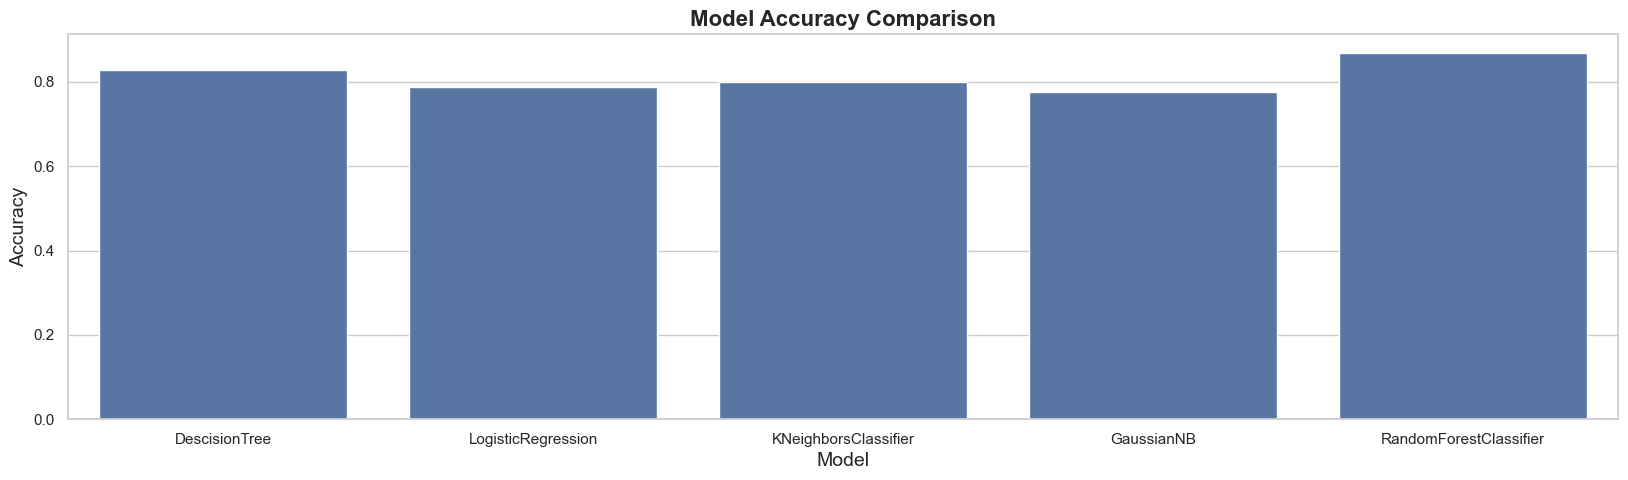

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.barplot(y ='Accuracy',x = 'Model',data = dfnew)
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)


### Aquí podemos ver que RFclassifier tiene una mejor precisión comparado con los otros modelos, aunque la diferencias no es demasiado grande respecto a Descisiontree por ejemplo.

# Conclusion: 
El conjunto de datos contiene 16 variables-datos y una variable objetivo para la clasificación binaria, que determina si el cliente suscribirá o no un depósito.

Con los datos bancarios proporcionados, se implementó un Análisis Exploratorio de Datos, visualización de los datos y se aplicó diferentes modelos de aprendizaje automático.

Evaluamos el modelo. Tras preprocesar los datos, aplicamos varios algoritmos de clasificación.

Esto demostró que el Modelo Random Forest Classiffer tuvo un excelente rendimiento con una alta precisión (89%) en comparación con otros algoritmos.

# Conclusiones Generales

- El dataset presenta una estructura sólida y no contiene valores faltantes, lo que facilita el preprocesamiento.
- Se observa un desbalance importante en la variable objetivo, aspecto clave a considerar en etapas de modelado.
- Variables demográficas y de interacción con campañas muestran patrones relevantes asociados a la suscripción.
- El EDA realizado permite formular hipótesis claras para el desarrollo de modelos de clasificación y estrategias de marketing más efectivas.

